<a href="https://colab.research.google.com/github/Laura-Neff/FeatureCorrelations/blob/main/FeatureCorrelations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install yellowbrick 
#Open source Python project which extends the scikit-learn API with visual analysis and diagnostic tools that helps model selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
diabetes = pd.read_csv('diabetes.csv')

diabetes.head(10)

#view the feature correlations that exist in our diabetes dataset
#use health characteristics of these individuals to build a classification model to predict whether they have diabetes or not 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [47]:
diabetes_corr = diabetes.corr()

diabetes_corr

#Correlation matrix
# -1 = perfectly negatively correlated
# 1 = perfectly positively correlated 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


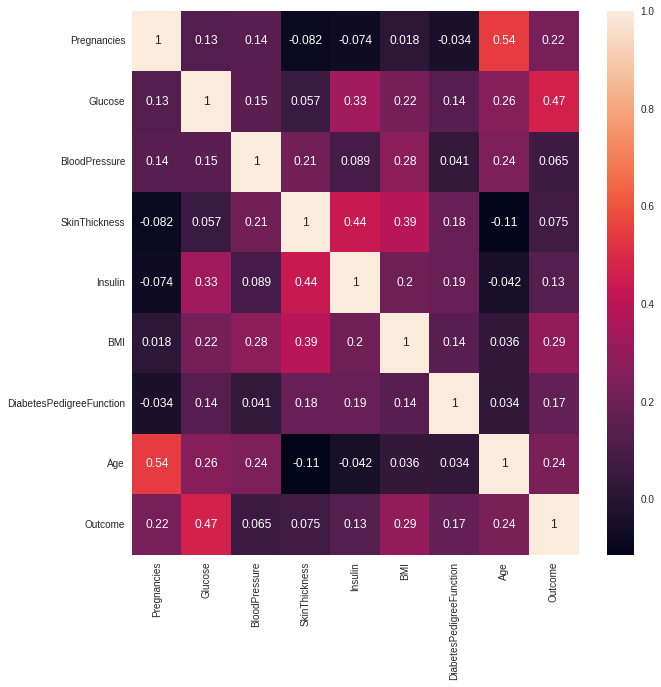

In [48]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(diabetes_corr, annot=True)
plt.show()
#plot heatmap

In the above matrix we can figure out that the correlation score is higher for Insulin and BMI. So now we are going to use FeatureCorrelation function to visualize how 'Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction' are correlated with 'Age'.
We are taking 4 columns 'Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction' as features and 'Age' as label.

In [49]:
#Now we are going to see if these features are positively or negatively correlated with age

X = diabetes[['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction']]

Y = diabetes['Age']

In [50]:
feature_names = X.columns

feature_names

Index(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

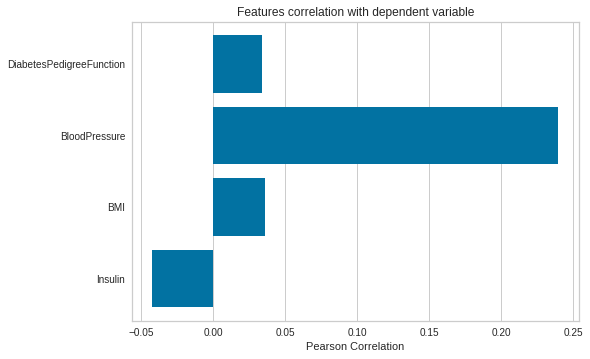

In [51]:
from yellowbrick.target import FeatureCorrelation

#The FeatureCorrelation object, by default, calculates the Pearson's correlation between 2 variables, which is
#A measure of the linear correlation between 2 variables. 1 is total positive correlation and -1 is total negative correlation
#0 means no correlation at all
#correlations are very sensitive to outliers

visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
visualizer.fit(X, Y)
visualizer.poof() #displays visualization

#BloodPressure, DiabetesPedigreeFunction, and BMI are positively correlated with age while Insulin is negatively correlated with age

In [52]:
visualizer.scores_ #See individual scores by themselves

array([-0.04216295,  0.03624187,  0.23952795,  0.03356131])

In [53]:
visualizer.features_ #corresponding labels to above

array(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'],
      dtype=object)

In [54]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

#We can see that the scores are same as we got in above correlation matrix

,Feature_names,Scores
0,Insulin,-0.042163
1,BMI,0.036242
2,BloodPressure,0.239528
3,DiabetesPedigreeFunction,0.033561


Split dataset into features and labels

We are now going to represent our same dataframe from before as a FeatureCorrelation object (which calculates the Pearson's correlation between 2 variables) instead of a heatmap

In [55]:
X = diabetes.drop('Outcome', axis=1)

Y = diabetes['Outcome']

In [56]:
feature_names = X.columns

feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

It's important to realize that Pearson's correlations are meaningful only for metric variables, typically continuous numeric variables. They can also be used with dichotomous variables: variables with 2 discrete values, such as outcome or male vs. female, etc.

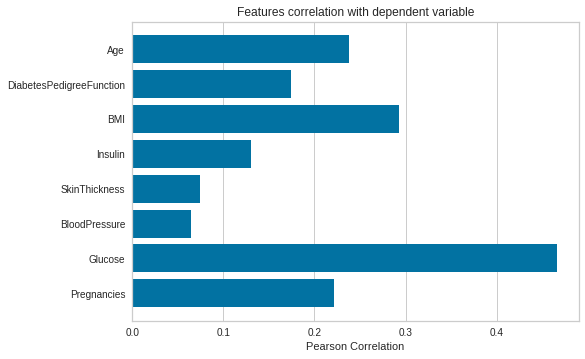

In [57]:
visualizer = FeatureCorrelation(labels=feature_names, method='pearson')
visualizer.fit(X, Y)
visualizer.poof()

In [58]:
visualizer.scores_

array([0.22189815, 0.4665814 , 0.06506836, 0.07475223, 0.13054795,
       0.29269466, 0.17384407, 0.23835598])

In [59]:
visualizer.features_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [60]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,Pregnancies,0.221898
1,Glucose,0.466581
2,BloodPressure,0.065068
3,SkinThickness,0.074752
4,Insulin,0.130548
5,BMI,0.292695
6,DiabetesPedigreeFunction,0.173844
7,Age,0.238356


Correlations between 2 variables can be calculated using other techniques as well, such as mutual information. You can think of "pregnancies" as a discrete variable. If you think about it, pregnancies are discrete numeric values (you can count them?). When you're calculating correlations using mutual information, you need to specify what values are discrete

Mutual Information = measures the dependency between 2 variables; equal to 0 when 2 variables are independent, non-zero otherwise

It tries to quantify the information obtained about 1 random variable through observing the other random variable.


(Does it calculate causation?)

In [61]:
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

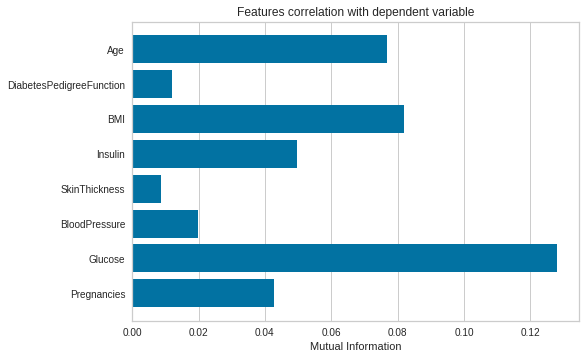

In [62]:
#Set up Boolean vector with true/false values, representing whether a variable is a discrete feature or not

discrete_features = [False for _ in range(len(feature_names))]
discrete_features[0] = True

#calculate correlations using mutual_info-classification method
visualizer = FeatureCorrelation(method='mutual_info-classification',
                                labels=feature_names)

#when calculating feature correlations for classification (when output is a discrete variable using this technique, 
#you need to specify which input features are discrete because calculation of correlation for discrete features
#is different from that of continuous numeric features 
visualizer.fit(X, Y, discrete_features=discrete_features, random_state=0)

visualizer.poof()

#You see now that we are using a different technique, all of these vars are positively correlated with outcome 

In [63]:
score_df = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

score_df

,Feature_names,Scores
0,Pregnancies,0.042854
1,Glucose,0.128141
2,BloodPressure,0.019959
3,SkinThickness,0.008760
4,Insulin,0.049821
5,BMI,0.081901
6,DiabetesPedigreeFunction,0.012049
7,Age,0.076876


In [64]:
#If you want to calculate the correlation for all vars with outcome using this method but only plot for certain vars
#just follow the below

feature_to_plot = ['Age', 'BMI', 'Insulin', 'BloodPressure', 'Glucose']

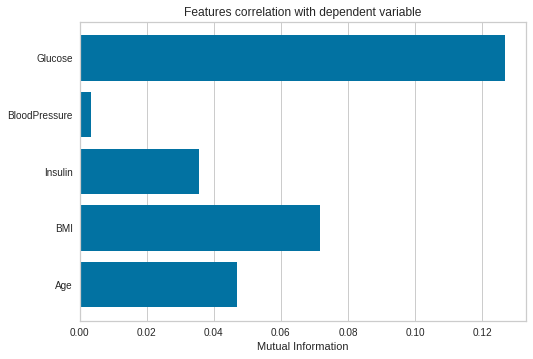

In [65]:
visualizer = FeatureCorrelation(method='mutual_info-classification',
                                feature_names=feature_to_plot)

visualizer.fit(X, Y, random_state=0)

visualizer.poof()